In [556]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import importlib

import trees

importlib.reload(trees);

**Generate data based on sin function.**

In [557]:
X = np.linspace(0, 2*np.pi, 50)
y_sin = np.sin(np.linspace(0, 2*np.pi, 50))
y = np.sin(np.linspace(0, 2*np.pi, 50)) + np.random.normal(0, 0.1, 50)

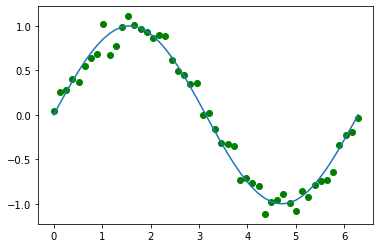

In [558]:
plt.plot(X, y_sin)
plt.scatter(X, y, color="green")

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, shuffle=True)

**Test DT regressor.**

In [560]:
tree = trees.ImpDecisionTreeRegressor(4)

In [561]:
tree.fit(X_train, y_train)

/Users/tigranfahradyan/Desktop/python3/machine_learning/ACA_course/machine_learning/homeworks/homework5/trees.py:15: RuntimeWarning: Mean of empty slice.
  y_pred = y_true.mean()
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [562]:
tree.leaf_list

[DecisionLeaf (prediction : -0.030404805157309176),
 DecisionLeaf (prediction : -0.18978122526657792),
 DecisionLeaf (prediction : -0.23119378816775282),
 DecisionLeaf (prediction : -0.34172119783782207),
 DecisionLeaf (prediction : -0.6443060103474685),
 DecisionLeaf (prediction : -0.7391659871342575),
 DecisionLeaf (prediction : -0.9316173493862494),
 DecisionLeaf (prediction : -0.7657605868692962),
 DecisionLeaf (prediction : -0.3519080501079793),
 DecisionLeaf (prediction : -0.15618408868216851),
 DecisionLeaf (prediction : 0.017096925427321302),
 DecisionLeaf (prediction : 0.001354548441516376),
 DecisionLeaf (prediction : 0.46763081643965254),
 DecisionLeaf (prediction : 0.6177525938827175),
 DecisionLeaf (prediction : 0.9680465558527044),
 DecisionLeaf (prediction : 0.6886260603885357),
 DecisionLeaf (prediction : 0.5436323487202223),
 DecisionLeaf (prediction : 0.38219800934067366),
 DecisionLeaf (prediction : 0.2679333767138047),
 DecisionLeaf (prediction : 0.04460127284072741

In [563]:
trees.RSS(tree.predict(X_test), y_test)

0.43421854811546917

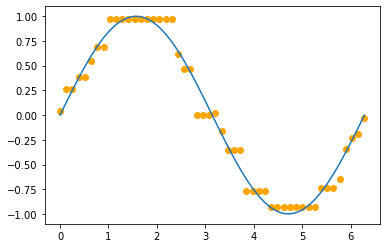

In [564]:
plt.plot(X, y_sin)
plt.scatter(X, tree.predict(X.reshape(-1, 1)), color="orange")

In [565]:
from sklearn.tree import DecisionTreeRegressor

In [566]:
t = DecisionTreeRegressor(max_depth=4)

In [567]:
t.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

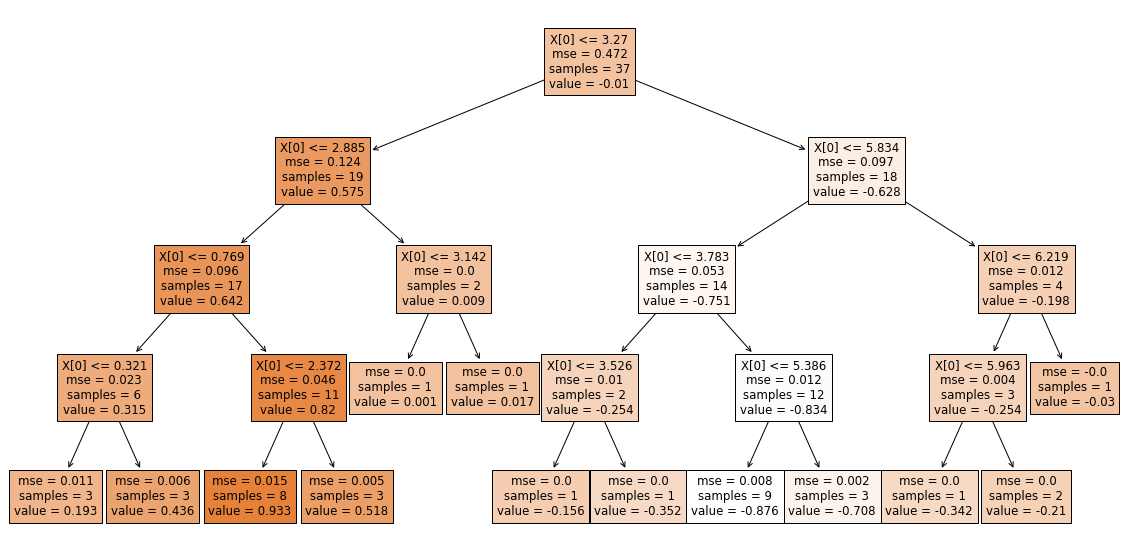

In [568]:
plt.figure(figsize = (20,10))
sklearn.tree.plot_tree(t, filled=True)
plt.show()

Compare to sklearn DecisionTree. See how trees approximate sin function.

In [569]:
print("Implemented", trees.RSS(y_test, tree.predict(X_test)))
print("Sklearn", trees.RSS(y_test, t.predict(X_test)))

Implemented 0.43421854811546917
Sklearn 0.44360658865344893


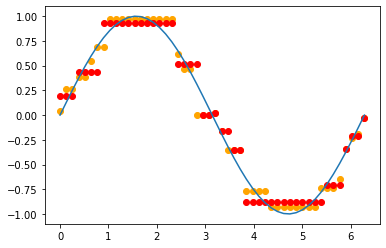

In [570]:
plt.plot(X, y_sin)
plt.scatter(X, tree.predict(X.reshape(-1, 1)), color="orange")
plt.scatter(X, t.predict(X.reshape(-1, 1)), color="red")

**Test DT classifier.**

In [571]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=2021)

*cross-entropy*

In [572]:
tree = trees.ImpDecisionTreeClassifier(4, metrics="cross-entropy")
tree.fit(X_train, y_train)
accuracy_score(y_test, tree.predict(X_test))

0.8947368421052632

In [573]:
tree.leaf_list

[DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0)]

*gini*

In [574]:
tree = trees.ImpDecisionTreeClassifier(4, metrics="gini")
tree.fit(X_train, y_train)
accuracy_score(y_test, tree.predict(X_test))

0.8947368421052632

In [575]:
tree.leaf_list

[DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 2),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 1),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0),
 DecisionLeaf (prediction : 0)]

In [576]:
tree

DecisionNode (split_label : feature3, split_index : 2,  split_value : 1.9285714285714288, metrics_value : 0.4999111111111111), sub_nodes (DecisionNode (split_label : feature4, split_index : 3,  split_value : 1.6428571428571428, metrics_value : 0.09730440499671272), sub_nodes (DecisionNode (split_label : feature1, split_index : 0,  split_value : 5.042857142857144, metrics_value : 0.0), sub_nodes (DecisionNode (split_label : feature1, split_index : 0,  split_value : 5.709523809523809, metrics_value : 0.0), sub_nodes (DecisionNode (split_label : feature1, split_index : 0,  split_value : 5.8999999999999995, metrics_value : 0.0), sub_nodes (DecisionLeaf (prediction : 2), DecisionLeaf (prediction : 2)), DecisionNode (split_label : feature1, split_index : 0,  split_value : 5.604761904761904, metrics_value : 0.0), sub_nodes (DecisionLeaf (prediction : 2), DecisionLeaf (prediction : 2))), DecisionLeaf (prediction : 2)), DecisionNode (split_label : feature3, split_index : 2,  split_value : 5.204

In [577]:
from sklearn.tree import DecisionTreeClassifier

In [578]:
t = DecisionTreeClassifier(max_depth=100, criterion="gini")

In [579]:
t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100)

In [580]:
print("Implemented :", accuracy_score(y_test, t.predict(X_test)))
print("sklearn :", accuracy_score(y_test, tree.predict(X_test)))

Implemented : 0.8947368421052632
sklearn : 0.8947368421052632


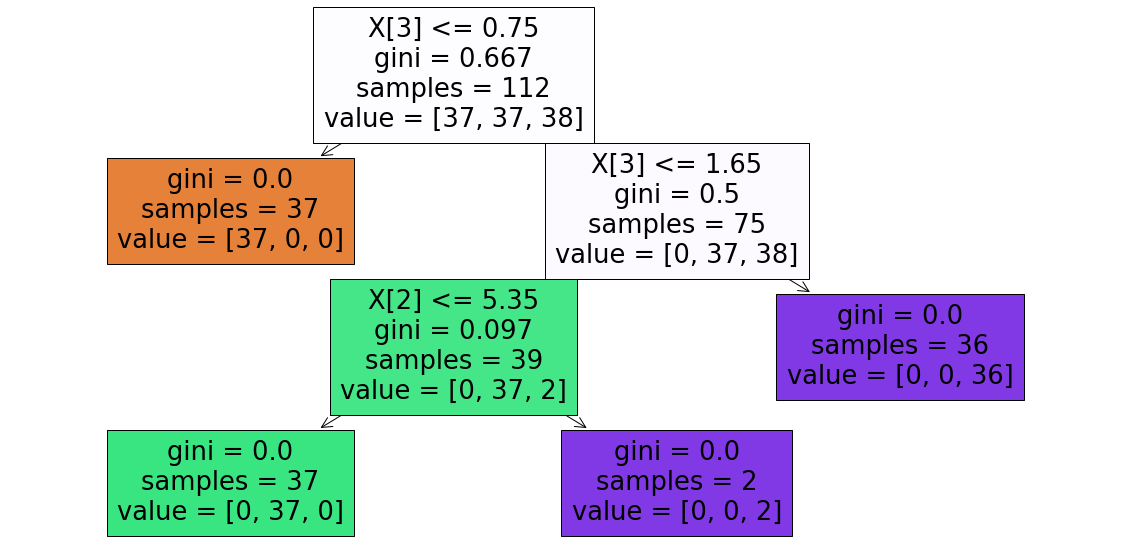

In [581]:
plt.figure(figsize = (20,10))
sklearn.tree.plot_tree(t, filled=True)
plt.show()

**Let's plot some beautiful stuff.**

In [582]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [583]:
tree = trees.ImpDecisionTreeClassifier(5)
tree.fit(X, y)

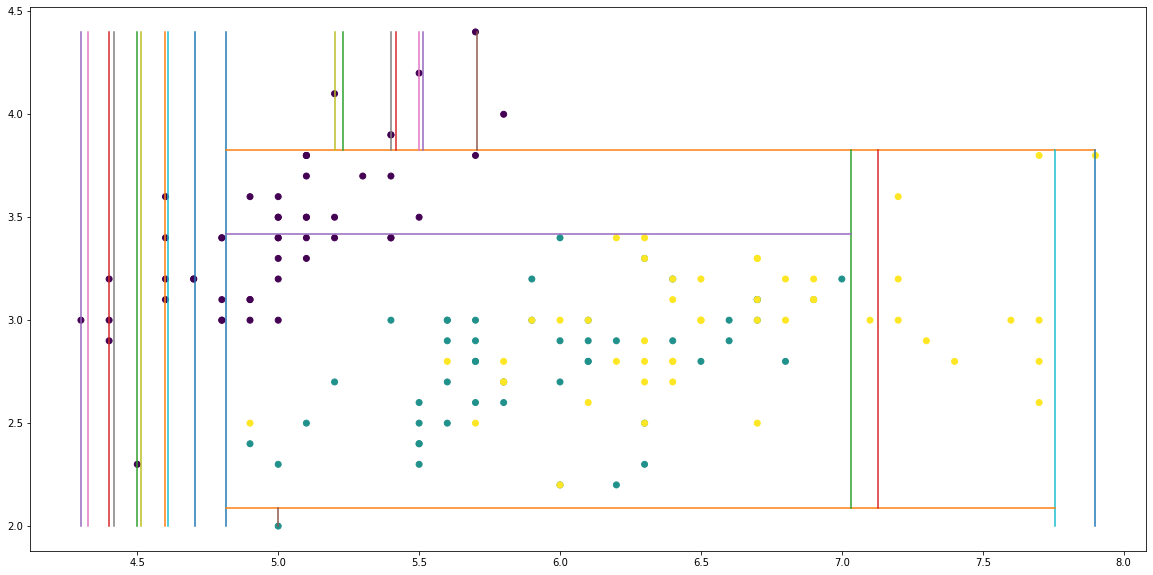

In [584]:
plt.figure(figsize = (20,10))
plt.scatter(X[:, 0], X[:, 1], c=y)

def plot_node(node, f1_min, f2_min, f1_max, f2_max):
    
    if node.split_index == 0:
        plt.plot([node.split_value, node.split_value], [f2_min, f2_max])
        if node.sub_node1 and node.sub_node2:
            plot_node(node.sub_node1, node.split_value, f2_min, f1_max, f2_max)
            plot_node(node.sub_node2, f1_min, f2_min, node.split_value, f2_max)
    elif node.split_index == 1:
        plt.plot([f1_min, f1_max], [node.split_value, node.split_value])
        if node.sub_node1 and node.sub_node2:
            plot_node(node.sub_node1, f1_min, node.split_value, f1_max, f2_max)
            plot_node(node.sub_node2, f1_min, f2_min, f1_max, node.split_value) 
    

plot_node(tree.root_node, X[:, 0].min(), X[:, 1].min(), X[:, 0].max(), X[:, 1].max())